In [1]:
%matplotlib inline

In [2]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [3]:
import utils; reload(utils)
from utils import plots


Using cuDNN version 5103 on context None
Mapped name None to device cuda0: Tesla K80 (0000:00:04.0)
Using Theano backend.


In [4]:
batch_size=64


In [5]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [26]:
path = "data/redux/sample"
# path = "data/redux"

In [27]:
vgg = Vgg16()
batches = vgg.get_batches(path+"/train", batch_size=batch_size)
validate_batches = vgg.get_batches(path+"/valid", batch_size=batch_size*2)
vgg.finetune(batches)

Found 218 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [30]:
vgg.fit(batches, validate_batches, nb_epoch=10)

Epoch 1/10
218/218 [==============================] - 7s - loss: 0.2158 - acc: 0.9450 - val_loss: 0.1145 - val_acc: 0.9483
Epoch 2/10
218/218 [==============================] - 7s - loss: 0.0731 - acc: 0.9633 - val_loss: 0.1725 - val_acc: 0.9655
Epoch 3/10
218/218 [==============================] - 6s - loss: 0.1041 - acc: 0.9633 - val_loss: 0.2422 - val_acc: 0.9655
Epoch 4/10
218/218 [==============================] - 6s - loss: 0.0439 - acc: 0.9862 - val_loss: 0.3234 - val_acc: 0.9483
Epoch 5/10
218/218 [==============================] - 6s - loss: 0.0437 - acc: 0.9771 - val_loss: 0.3473 - val_acc: 0.9483
Epoch 6/10
218/218 [==============================] - 6s - loss: 0.0867 - acc: 0.9862 - val_loss: 0.3158 - val_acc: 0.9483
Epoch 7/10
218/218 [==============================] - 6s - loss: 0.0193 - acc: 0.9908 - val_loss: 0.2749 - val_acc: 0.9483
Epoch 8/10
218/218 [==============================] - 6s - loss: 0.0170 - acc: 0.9954 - val_loss: 0.2388 - val_acc: 0.9483
Epoch 9/10
218/2

In [31]:
real_path = "data/redux"


In [33]:
vgg = Vgg16()
batches = vgg.get_batches(real_path+"/train", batch_size=batch_size)
validate_batches = vgg.get_batches(real_path+"/valid", batch_size=batch_size*2)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [35]:
vgg.fit(batches, validate_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 513s - loss: 0.1060 - acc: 0.9731 - val_loss: 0.0697 - val_acc: 0.9840


In [37]:
test_batches = vgg.get_batches(real_path+"/train", batch_size=4)

Found 23000 images belonging to 2 classes.


In [41]:
imgs, labels = next(test_batches)

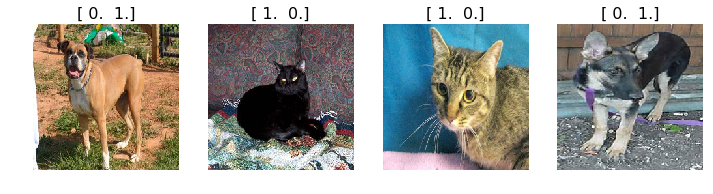

In [42]:
plots(imgs, titles=labels)

In [46]:
vgg.predict(imgs, True)

(array([ 0.772 ,  0.9679,  0.9686,  0.8712], dtype=float32),
 array([1, 0, 1, 0]),
 ['dogs', 'cats', 'dogs', 'cats'])

In [49]:
test_path = "data/redux/test/"

In [50]:
test_batches, preds = vgg.test(test_path, batch_size=batch_size*2)

Found 12500 images belonging to 1 classes.


In [54]:
preds[:5]

array([[ 0.1711,  0.8289],
       [ 0.0607,  0.9393],
       [ 0.3957,  0.6043],
       [ 0.4848,  0.5152],
       [ 0.7971,  0.2029]], dtype=float32)

In [55]:
names = test_batches.filenames
names[:5]

['unknown/7596.jpg',
 'unknown/1677.jpg',
 'unknown/749.jpg',
 'unknown/10225.jpg',
 'unknown/914.jpg']

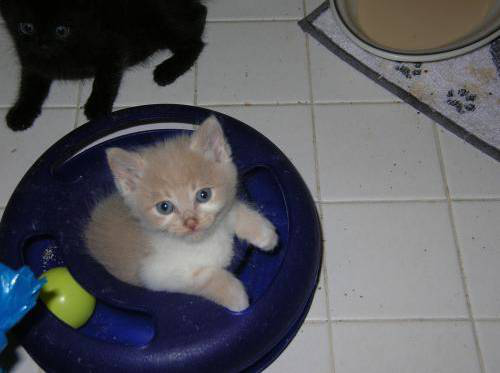

In [62]:
from PIL import Image
Image.open(test_path + names[4])

In [67]:
ids = []
for name in names:
    ids.append(name.replace("unknown/","").replace(".jpg", ""))

In [68]:
ids[:5]

['7596', '1677', '749', '10225', '914']

In [70]:
for index, id in enumerate(ids):
    print(id, preds[index][1])

7596 0.828875
1677 0.93927
749 0.604325
10225 0.51515
914 0.202943
4857 0.728893
3105 0.545024
8289 0.549669
1759 0.467243
4902 0.249172
1719 0.608611
5446 0.335517
5955 0.267657
4357 0.475023
1342 0.918686
3075 0.405985
5812 0.913529
9391 0.101358
2712 0.828637
8531 0.0142233
6562 0.257232
9961 0.0309296
7054 0.838553
787 0.527821
644 0.979579
2167 0.970833
354 0.618774
9571 0.321092
5091 0.989034
12106 0.544442
182 0.146593
70 0.592773
704 0.774635
1353 0.97575
11656 0.599053
11877 0.952955
10893 0.199277
2500 0.547207
6457 0.693554
8756 0.836554
10644 0.8715
4130 0.930214
2871 0.227939
12201 0.522261
569 0.204851
4107 0.0277735
1897 0.916999
8866 0.408861
10089 0.782815
11534 0.0416447
6792 0.981112
8362 0.595052
1285 0.782737
7886 0.220652
10392 0.358777
9591 0.274375
9397 0.935937
9436 0.698903
8051 0.543405
8 0.505434
6525 0.961347
3689 0.0209328
8201 0.40129
623 0.564531
9249 0.220253
4539 0.929829
12276 0.346695
9938 0.562616
3430 0.45197
2881 0.734063
7691 0.337557
1994 0.1774

781 0.214341
2080 0.469117
313 0.0131247
3297 0.0235625
11588 0.238907
4761 0.125704
3979 0.710423
10093 0.448152
10287 0.385987
5603 0.871699
2250 0.524826
1822 0.435855
2516 0.309139
3850 0.518414
2112 0.338559
7385 0.00650188
10370 0.33903
11197 0.314513
5570 0.679586
671 0.913016
12171 0.546872
10904 0.879464
9392 0.875938
7664 0.340907
964 0.054091
8279 0.959245
5213 0.726914
6203 0.777658
6527 0.957565
2511 0.621336
1821 0.731065
6729 0.942277
5266 0.72212
7548 0.975934
10867 0.568031
4733 0.467508
7004 0.397863
9552 0.307638
3135 0.457127
5056 0.742422
12452 0.316073
10169 0.97778
2281 0.906041
8126 0.229466
4845 0.698553
8518 0.0409011
6716 0.972155
2006 0.203166
306 0.976592
10470 0.889039
12324 0.862477
4133 0.396871
2073 0.163894
4111 0.0328888
4265 0.401979
1760 0.599871
734 0.169489
9620 0.935992
2544 0.999409
8766 0.823128
1666 0.0660483
8040 0.820027
10384 0.827885
10997 0.983243
2333 0.84279
10317 0.858041
1886 0.921934
2900 0.758807
12009 0.704706
5526 0.546517
421 0.7

5468 0.98392
4979 0.652962
10114 0.325575
8868 0.576774
9122 0.0172677
2972 0.635367
9071 0.613936
1434 0.161459
1859 0.788674
2243 0.357694
3256 0.0908332
6005 0.758612
11825 0.750442
8716 0.855753
3455 0.849232
3936 0.880856
9208 0.40198
2614 0.0604786
4381 0.383458
9893 0.703808
8873 0.160515
6379 0.486034
11804 0.478644
3136 0.687102
7545 0.850308
4310 0.0789757
5908 0.0659487
1486 0.139565
2444 0.95204
2792 0.532018
8774 0.199446
1811 0.961943
8210 0.200465
10714 0.221114
7749 0.171349
12074 0.467097
6433 0.506879
6959 0.224223
11288 0.0608001
4528 0.0243206
1081 0.980279
9934 0.975664
5124 0.651148
10241 0.274776
842 0.796237
4518 0.762901
3971 0.0811241
127 0.489591
5234 0.813525
2245 0.679769
4907 0.0105547
5741 0.482056
4169 0.65313
3989 0.215901
1941 0.666053
4516 0.930066
11697 0.0605509
12099 0.0275316
758 0.378308
5031 0.353716
4140 0.79385
11869 0.360697
3503 0.604329
8521 0.408806
6261 0.268167
3494 0.960218
10954 0.269323
4659 0.777118
1853 0.729497
7344 0.802501
6927 0

4522 0.293602
1769 0.689255
8348 0.971532
10831 0.834249
8564 0.378744
5977 0.447377
12090 0.808663
8870 0.837039
1004 0.377401
859 0.804641
3145 0.248371
496 0.924523
2583 0.70929
9271 0.693606
8272 0.978331
12102 0.172644
6018 0.854969
2643 0.935814
4475 0.873532
10055 0.801266
2672 0.606203
2870 0.863633
8117 0.292765
4506 0.562751
8591 0.158187
1745 0.734956
4467 0.219845
9377 0.342822
10192 0.573229
10404 0.859809
5225 0.423743
2933 0.246665
4703 0.489233
5291 0.473681
16 0.389552
8828 0.846015
12382 0.249198
10617 0.402896
1388 0.891865
6646 0.862925
1110 0.753284
6921 0.0703712
4433 0.761905
8931 0.788906
9880 0.189842
4372 0.815504
5545 0.927939
4150 0.389232
11309 0.706065
7855 0.466281
8589 0.982709
7068 0.165513
11284 0.872611
5456 0.75537
689 0.886823
11299 0.160725
6194 0.432198
9073 0.560788
4376 0.25393
2797 0.152599
4490 0.240004
319 0.945078
11546 0.824871
11465 0.826534
8214 0.949513
10902 0.781574
1641 0.965683
2019 0.277607
11901 0.293852
9939 0.565816
8976 0.043018

11380 0.177888
978 0.00463649
5435 0.00164222
4436 0.900975
11604 0.227228
2790 0.313303
10399 0.748869
6705 0.497717
4618 0.925601
11694 0.747422
10816 0.0703169
517 0.697372
7898 0.591872
10545 0.203624
367 0.779239
4260 0.572897
6262 0.856491
10479 0.929043
3083 0.444438
2087 0.655724
3501 0.791029
9561 0.597293
2318 0.244661
11450 0.0105442
3775 0.926376
7099 0.435311
2349 0.593383
7043 0.0969294
1022 0.941264
507 0.176986
8159 0.996039
6206 0.389087
329 0.129413
11164 0.713666
9582 0.219389
12200 0.496589
9473 0.0924687
7100 0.593452
8621 0.285723
9283 0.540838
5980 0.791416
316 0.314386
10472 0.336283
7480 0.854594
2120 0.531954
880 0.286698
3266 0.857264
6622 0.372307
6858 0.764415
10834 0.0337775
9387 0.346303
6134 0.286775
11938 0.803155
5122 0.541648
9310 0.987436
3365 0.928842
6074 0.890345
5758 0.0829962
11767 0.962584
6961 0.507754
7012 0.191052
11022 0.131255
4110 0.951067
208 0.541531
3043 0.92481
4600 0.780423
1602 0.74524
9146 0.868295
3058 0.126495
11595 0.168992
5085

12496 0.619116
10489 0.838097
5904 0.260332
11525 0.93909
3160 0.998324
2226 0.955129
5850 0.020297
3737 0.360478
9129 0.823758
1881 0.955432
5335 0.29917
9556 0.64606
854 0.89219
2455 0.506185
2096 0.401914
2902 0.927671
9330 0.259664
7840 0.480091
2689 0.233485
10123 0.0337003
11798 0.362588
4417 0.28529
3581 0.125788
2963 0.340787
275 0.365122
7468 0.971139
7866 0.209677
8765 0.0731861
7402 0.221208
4348 0.689124
5985 0.794801
873 0.253687
4138 0.0261937
8749 0.506534
21 0.641346
11142 0.846389
12193 0.039259
9896 0.431717
6399 0.00643645
485 0.652118
3601 0.987493
5819 0.96539
3976 0.633498
8122 0.858107
997 0.180894
2035 0.0993456
4122 0.402433
10641 0.830525
8066 0.856091
9648 0.91951
12108 0.904338
3857 0.837318
4706 0.196051
8954 0.0348016
2140 0.381416
7239 0.0596575
9112 0.834375
11448 0.696885
7518 0.946864
2230 0.865735
12307 0.453519
6789 0.0503014
10165 0.888554
8145 0.0322636
8418 0.0359819
12436 0.0109674
6023 0.160718
4323 0.179641
9395 0.185719
6095 0.0444931
1606 0.3

1757 0.0713281
4324 0.41838
12322 0.09622
10538 0.741435
3698 0.931132
10748 0.256459
5264 0.887276
8714 0.81934
12383 0.943399
3090 0.647236
5309 0.287787
5602 0.958498
8712 0.452125
10493 0.161014
6226 0.893367
4284 0.936553
11030 0.987103
4382 0.391763
7037 0.644965
4688 0.0221495
4742 0.410515
12124 0.5761
9203 0.705448
8549 0.0568003
6928 0.32683
5027 0.700408
12406 0.261165
2506 0.701326
4231 0.788043
1491 0.869813
9847 0.831048
5336 0.907246
1233 0.897116
289 0.442043
4625 0.695754
6918 0.386955
2899 0.617658
10892 0.273309
7352 0.499786
5958 0.123536
314 0.768085
6797 0.426244
2190 0.911035
7845 0.308894
11678 0.711902
7718 0.698088
4901 0.826344
4926 0.872953
3745 0.0834712
6903 0.023805
11884 0.00622552
2380 0.0837607
778 0.410335
1576 0.165253
9158 0.515543
8956 0.453461
4534 0.699593
10174 0.020434
11610 0.00833352
5017 0.915233
4551 0.362689
1270 0.98789
11940 0.986476
1891 0.353579
10729 0.418394
8599 0.063185
10923 0.171594
11015 0.0634284
8177 0.906673
6609 0.0636867
87

3070 0.718676
6728 0.944958
764 0.119066
5921 0.230128
9219 0.942587
7867 0.756307
7574 0.951376
3731 0.930793
7005 0.921285
5398 0.86809
6719 0.705503
2473 0.113525
2013 0.778255
6390 0.297461
11172 0.3106
4777 0.34835
11252 0.0639782
529 0.211587
6503 0.573968
12056 0.810625
7066 0.368727
6854 0.989368
9768 0.919437
5457 0.983433
1501 0.990668
3371 0.673846
10548 0.936587
1909 0.561258
3738 0.124057
4074 0.671658
8989 0.899686
2691 0.447672
4548 0.767582
9329 0.645473
3354 0.956068
2733 0.504496
4540 0.777303
8163 0.604082
1090 0.362183
1230 0.815229
5874 0.991492
5193 0.396304
8385 0.518223
2152 0.800622
5296 0.0592856
3516 0.946948
11741 0.68468
7103 0.474403
10580 0.923853
4718 0.987507
7937 0.074067
3000 0.187276
10328 0.368168
10254 0.339796
1842 0.963237
8617 0.824193
11332 0.388556
5177 0.785547
7052 0.887995
190 0.926841
7375 0.0759178
8402 0.525012
6724 0.323276
3168 0.0110197
5434 0.675809
8021 0.393515
11926 0.275275
6574 0.831733
9340 0.629839
1988 0.872293
6514 0.909581
